# Predicting Hazardous NEOs (Nearest Earth Objects)

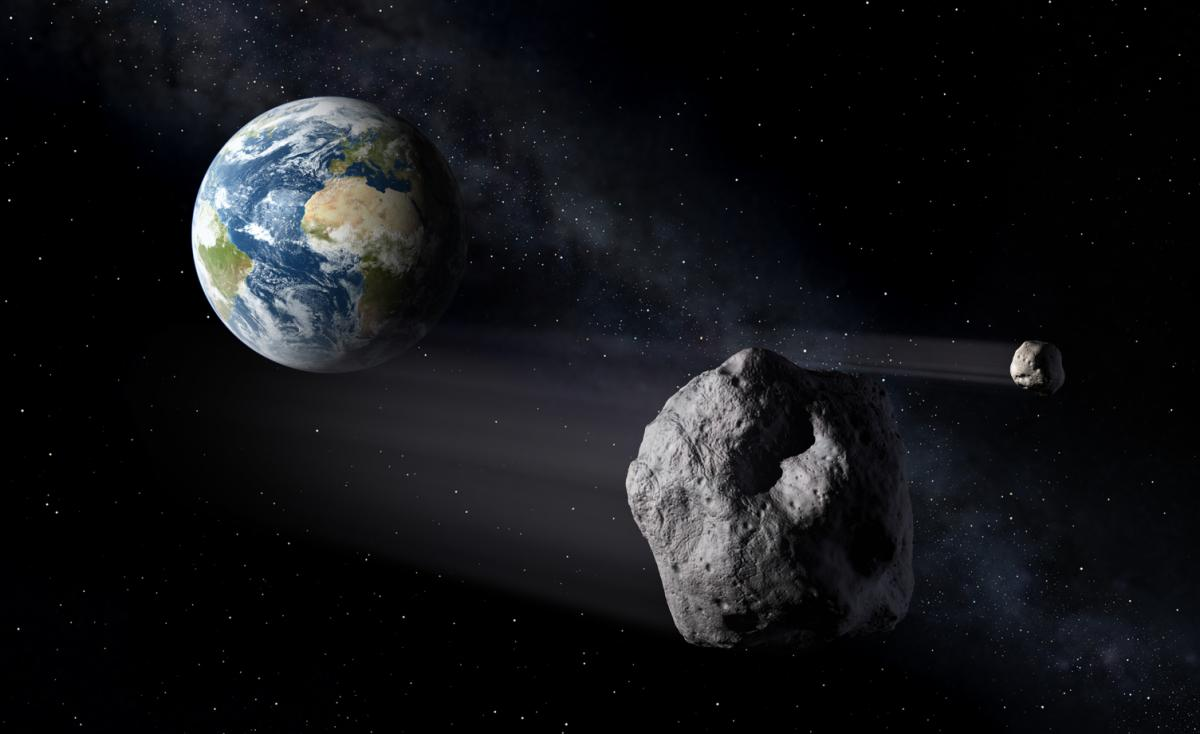

## Introduction
The **NASA Neo (Near-Earth Object)** data refers to information collected about celestial bodies, such as asteroids and comets, that come close to Earth's orbit. These objects are of significant interest because of their potential impact on Earth and their relevance for scientific study.

## Columns

**1. neo_id:** A unique identifier for each asteroid.

**2. name:** The official name assigned by NASA.

**3. absolute_magnitude:** The absolute magnitude of the Near-Earth Object

**4. estimated_diameter_min:** Minimum estimates of the asteroid's diameter in kilometers.

**5. estimated_diameter_max:** Maximum estimates of the asteroid's diameter in kilometers.

**6. orbiting_body:** The celestial body around which the asteroid orbits.

**7. relative_velocity:** The asteroid's speed relative to Earth, measured in kilometers per hour.

**8. miss_distance:** The closest distance the asteroid passes to Earth, in kilometers.

**9. is_hazardous:** A Boolean value indicating whether the asteroid is potentially dangerous to Earth.

# 1. Data Importing and Cleaning

## 1.1 Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## 1.2 Load Data to DataFrame

In [2]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [3]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
df.shape

(338199, 9)

## 1.3 Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

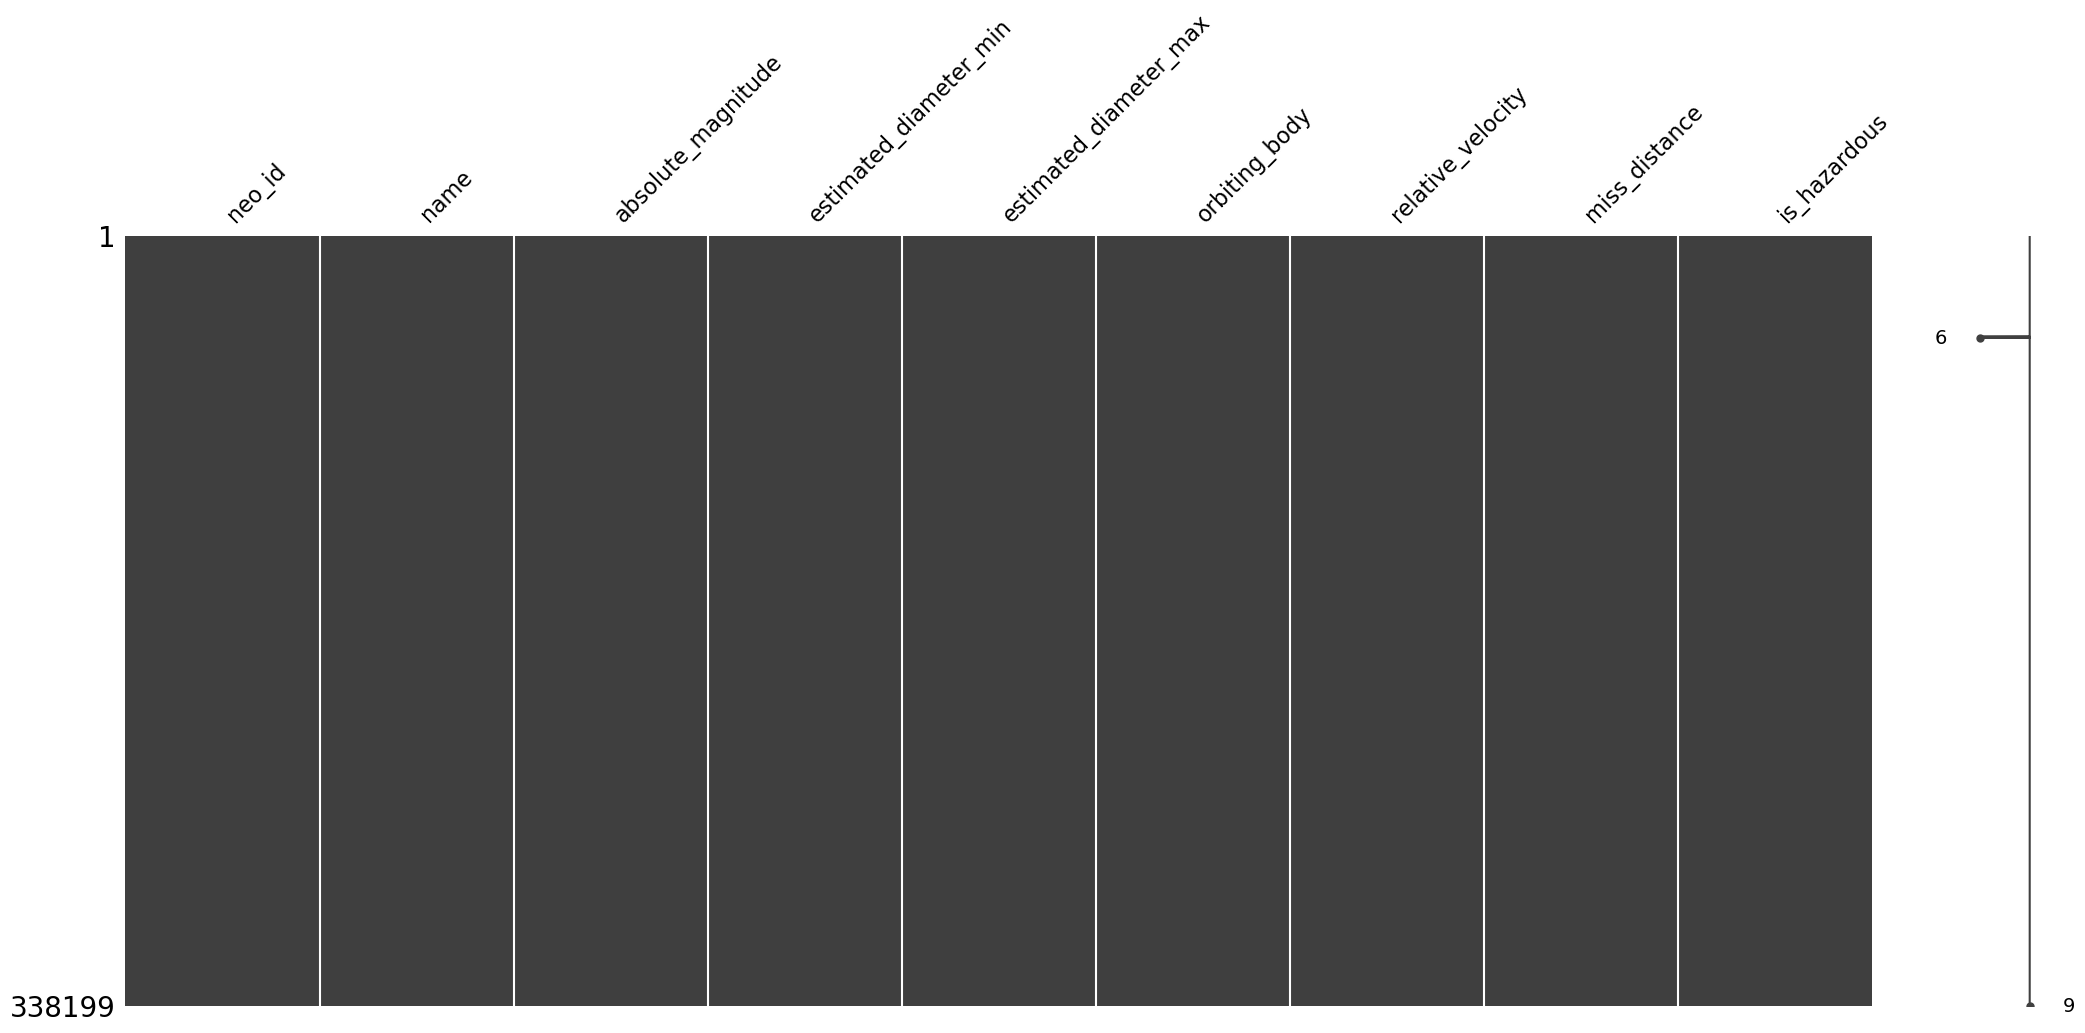

In [7]:
# use the matrix plot to display missing values in the dataset, sorted by name in ascending order.
msno.matrix(df.sort_values(by='name', ascending=True))
plt.show()

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

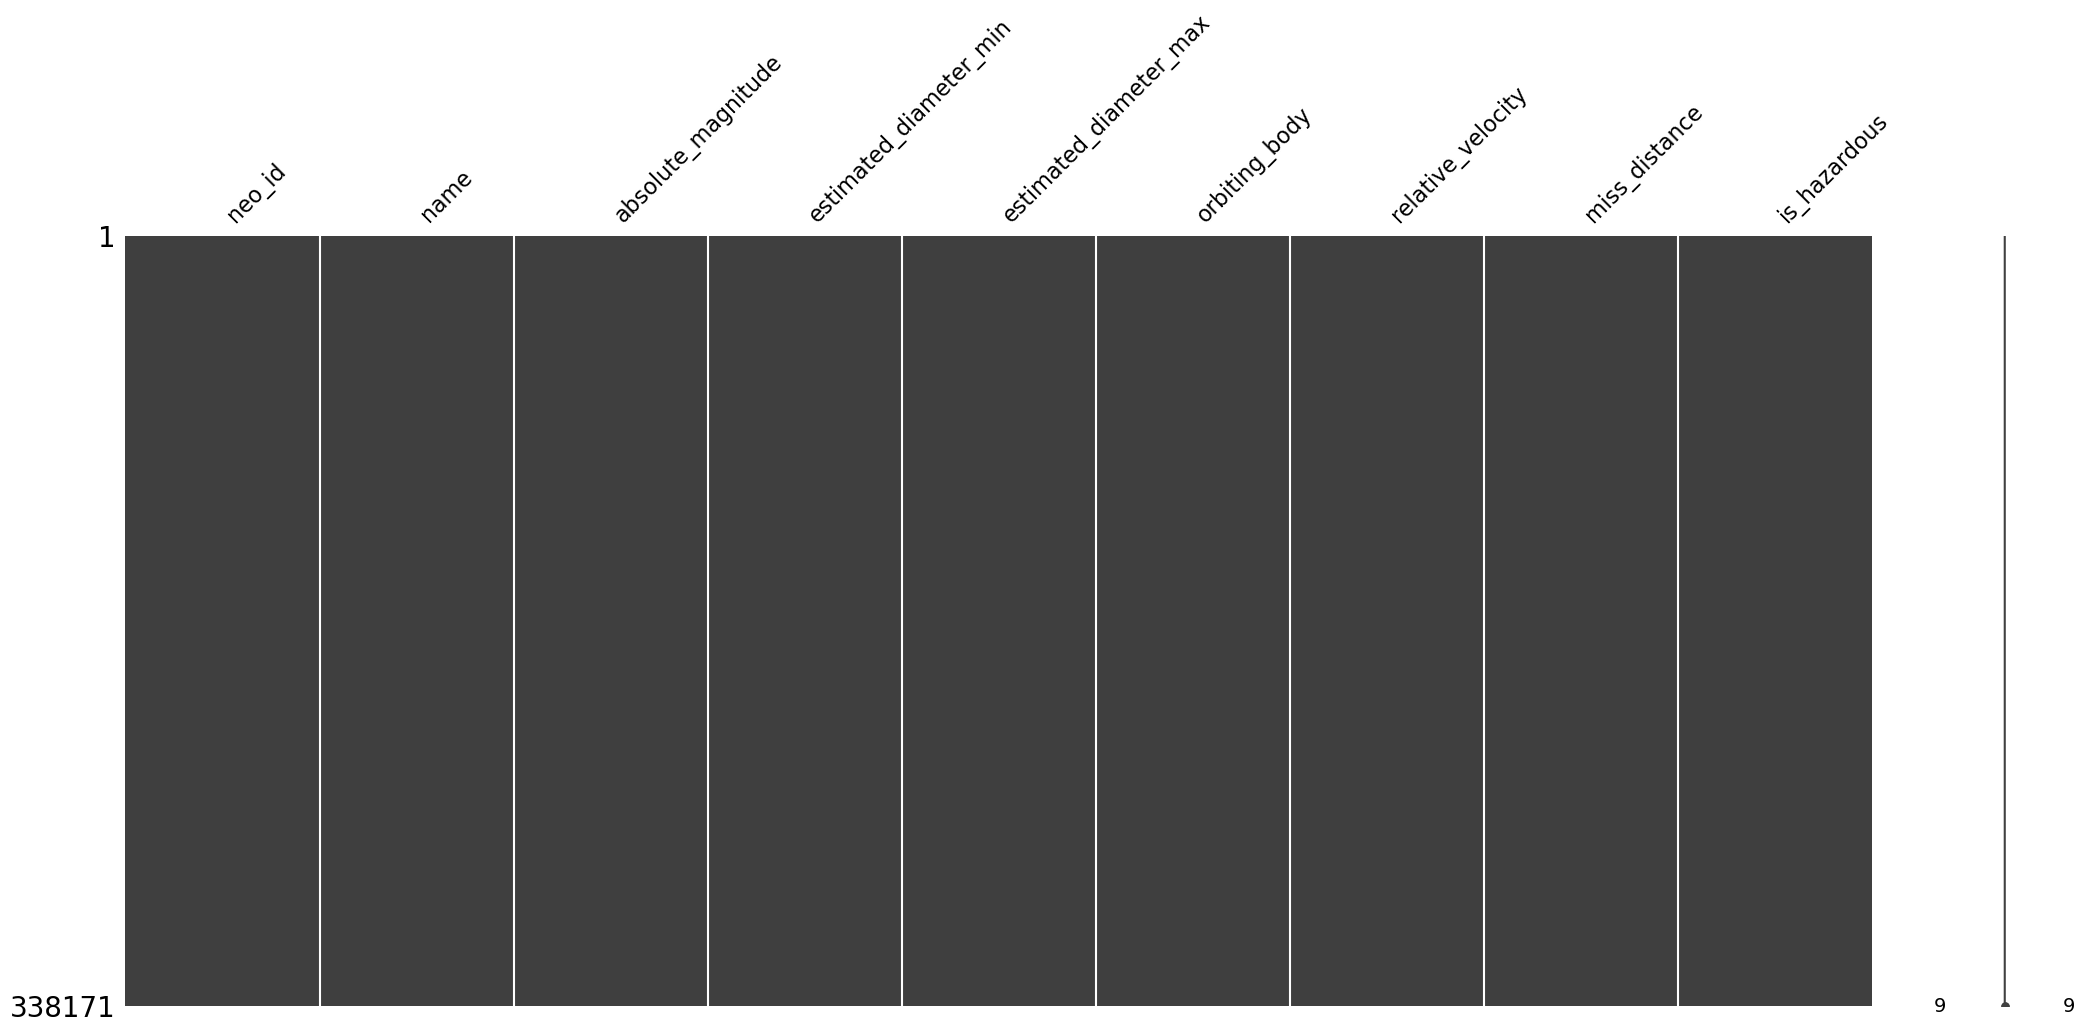

In [10]:
msno.matrix(df.sort_values(by='name', ascending=True))
plt.show()

## 1.4 Duplicates

In [11]:
duplicates = df.duplicated()
df[duplicates]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous


# 2. Exploratory Data Analysis (EDA):

In [12]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


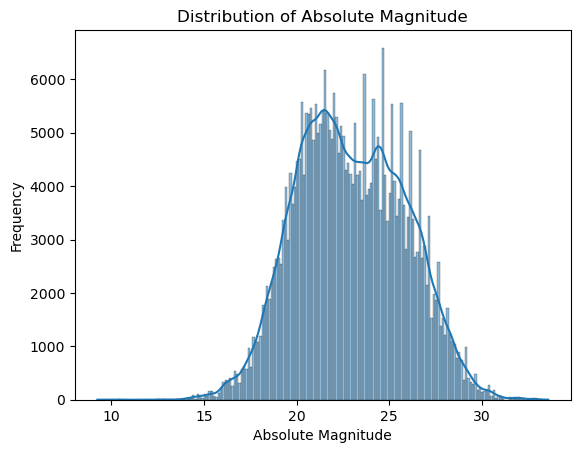

In [13]:
sns.histplot(df['absolute_magnitude'], kde=True)
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

Distribution of Absolute Magnitude close to normal distribution

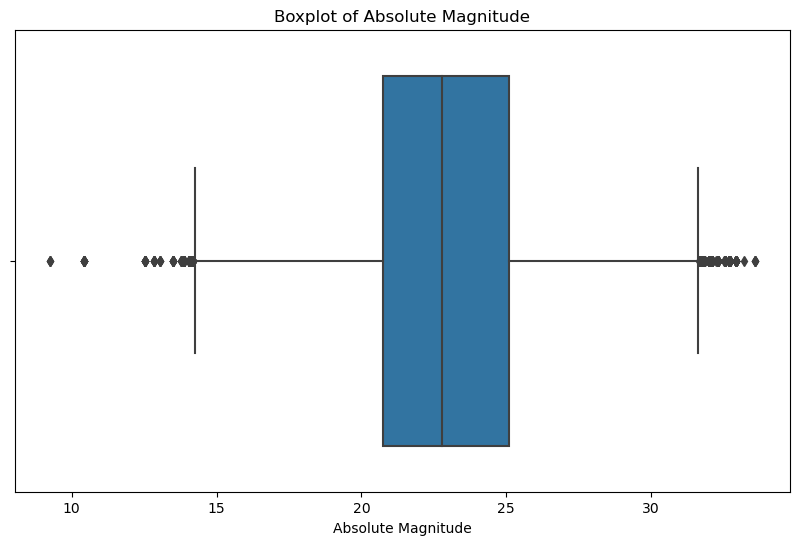

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['absolute_magnitude'])
plt.title('Boxplot of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.show()

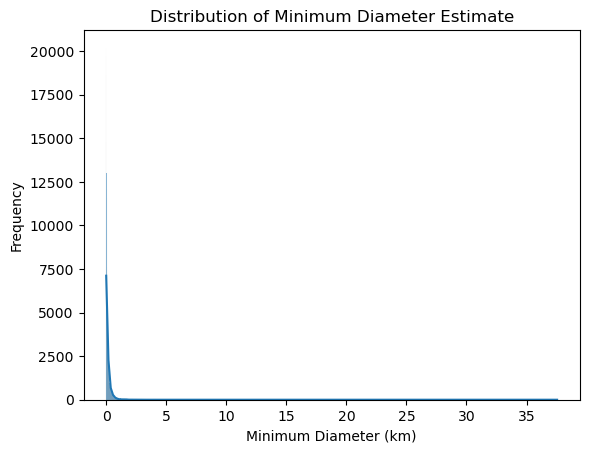

In [15]:
sns.histplot(df['estimated_diameter_min'], kde=True)
plt.title('Distribution of Minimum Diameter Estimate')
plt.xlabel('Minimum Diameter (km)')
plt.ylabel('Frequency')
plt.show()

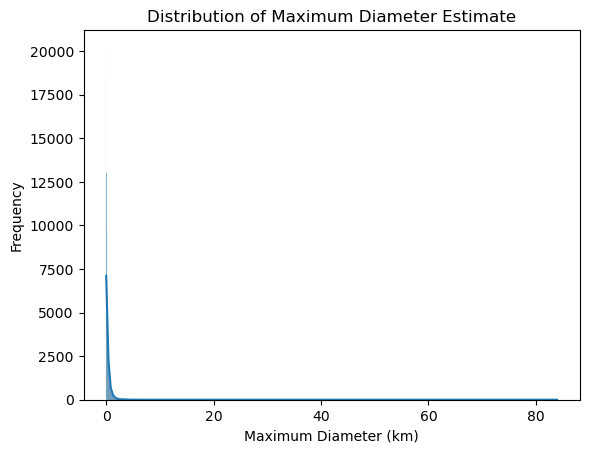

In [16]:
sns.histplot(df['estimated_diameter_max'], kde=True)
plt.title('Distribution of Maximum Diameter Estimate')
plt.xlabel('Maximum Diameter (km)')
plt.ylabel('Frequency')
plt.show()

Distributions of Min and Max Diameter Estimate are right skew

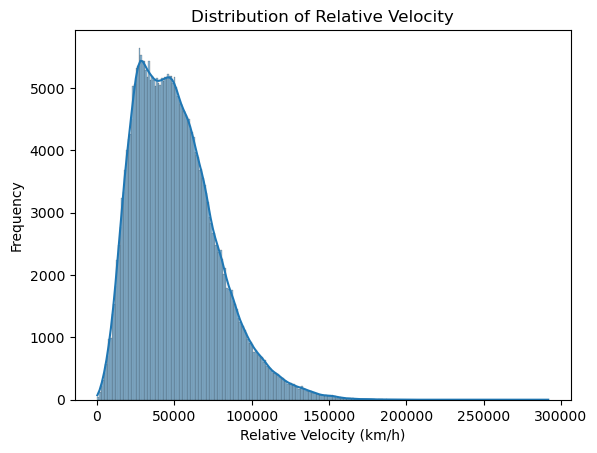

In [17]:
sns.histplot(df['relative_velocity'], kde=True)
plt.title('Distribution of Relative Velocity')
plt.xlabel('Relative Velocity (km/h)')
plt.ylabel('Frequency')
plt.show()

Distribution of Relative Velocity close to be right skew

Is Hazardous counts:
False    295009
True      43162
Name: is_hazardous, dtype: int64


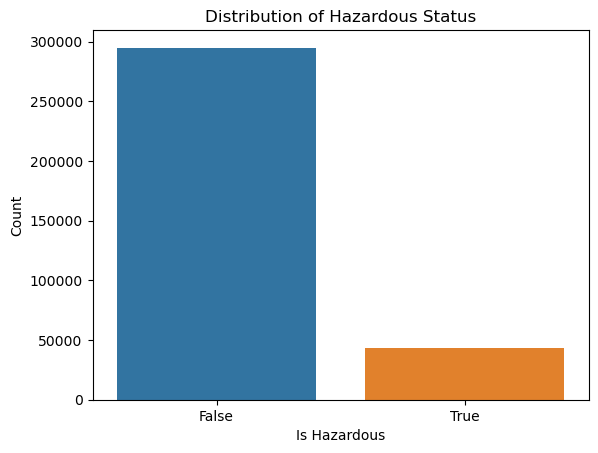

In [18]:
print(f"Is Hazardous counts:\n{df['is_hazardous'].value_counts()}")

sns.countplot(data=df, x='is_hazardous')
plt.title('Distribution of Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.show()

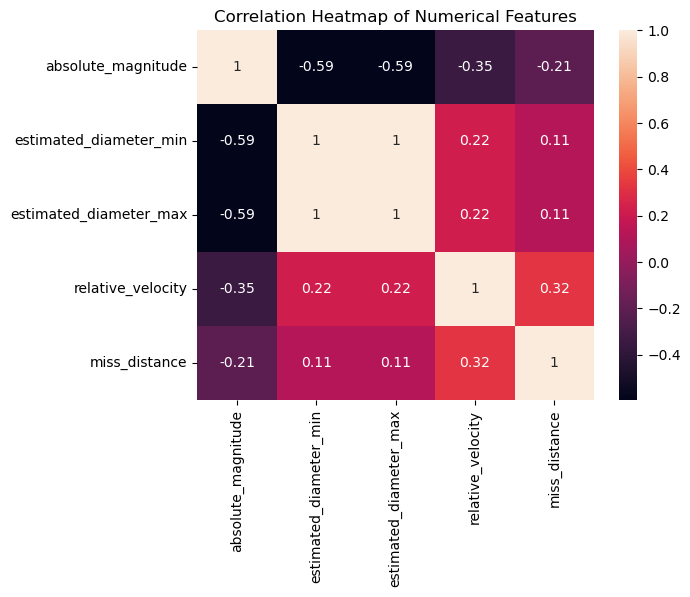

In [19]:
corr = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Data Preprocessing

## 3.1 Preparing The Data

### 3.1.1 Feature Selection

In [20]:
features = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body']]
target = df['is_hazardous']

### 3.1.2 Label Encoder

In [21]:
label_encoder = LabelEncoder()

features['orbiting_body'] = label_encoder.fit_transform(features['orbiting_body'])

C:\Users\hp\AppData\Local\Temp\ipykernel_3252\2020197365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['orbiting_body'] = label_encoder.fit_transform(features['orbiting_body'])


In [22]:
features.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
orbiting_body               int32
dtype: object

### 3.1.3 Scale Numerical Faeture

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']])
features[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']] = scaled_features

C:\Users\hp\AppData\Local\Temp\ipykernel_3252\2992146538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']] = scaled_features


### 3.1.4 Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 3.2 Handling Imbalanced Classes

### 3.2.1 Oversampling (SMOTE)

In [25]:
undersampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [26]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Balanced Accuracy: 0.8708


# 4. Model Training and Evaluation

## 4.1 Train Models

### 4.1.1 Initialize Models

In [28]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

### 4.1.2 Train Models

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Random Forest trained successfully.


## 4.2 Evaluate Models

In [30]:
metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC-ROC': []
}

Logistic Regression Metrics:
Precision: 0.4784
Recall: 0.0737
F1-Score: 0.1277
AUC-ROC: 0.8381
Random Forest Metrics:
Precision: 0.7212
Recall: 0.5911
F1-Score: 0.6497
AUC-ROC: 0.9498


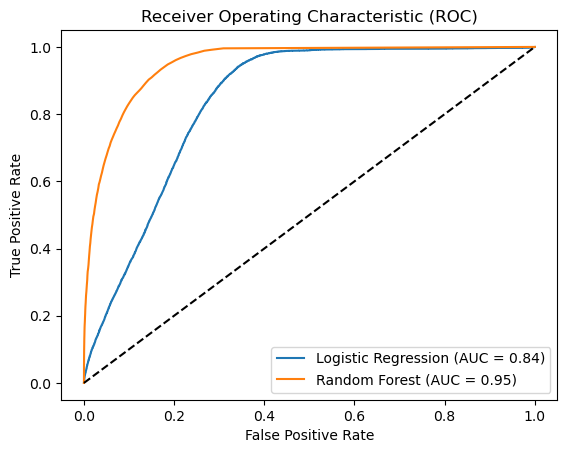

In [31]:
for name, model in models.items():
   
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    metrics['Model'].append(name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(auc_roc)
    
    print(f"{name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()